In [ ]:
import tensorflow as tf
from tensorflow import keras # -> tf.keras대신 keras만써도 되게 해주는 line

## 데이터 확인 및 정규화

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

In [ ]:
train_imgs.shape, train_labels.shape, test_imgs.shape, test_labels.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
import matplotlib.pyplot as plt

9


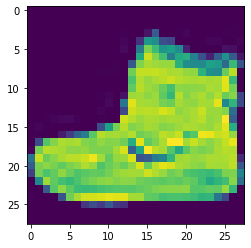

In [ ]:
plt.imshow(train_imgs[0])
print(train_labels[0])

In [ ]:
import numpy as np

In [ ]:
np.max(train_imgs[0]), np.min(train_imgs[0])

(255, 0)

In [ ]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

In [ ]:
np.max(train_imgs[0]), np.min(train_imgs[0])

(1.0, 0.0)

9


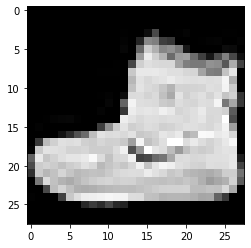

In [ ]:
plt.imshow(train_imgs[0], cmap='gray')
print(train_labels[0])

In [ ]:
# ndim 3 -> 4
train_imgs = train_imgs[..., tf.newaxis]
test_imgs = test_imgs[..., tf.newaxis]

In [ ]:
train_imgs.shape, test_imgs.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## 모델 정의

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax')) # output layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_imgs, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6512 - accuracy: 0.7599
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4362 - accuracy: 0.8399
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3831 - accuracy: 0.8588
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3497 - accuracy: 0.8699
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3247 - accuracy: 0.8804
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3057 - accuracy: 0.8858
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2891 - accuracy: 0.8928
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2745 - accuracy: 0.8959
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2588 - accuracy: 0.9025
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.250

In [ ]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8813


In [ ]:
print(test_loss, test_acc)

0.3433370590209961 0.8812999725341797


In [ ]:
predictions = model.predict(test_imgs)

5


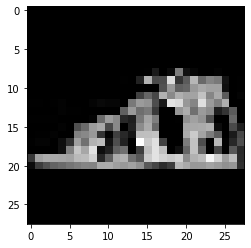

In [ ]:
test_idx = 11
plt.imshow(test_imgs[test_idx][:,:,0], cmap='gray')
print(np.argmax(predictions[test_idx]))